In [1]:
import os

dir=os.listdir('dataset')
os.mkdir('dataset_transoform')
for a in dir:
    os.mkdir('dataset_transoform/'+a)

In [2]:
import pandas as pd
from scipy.stats import skew,kurtosis
from ast import literal_eval
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import signal
from scipy.fftpack import rfft, irfft, fftfreq, fft,ifft
from scipy.signal import find_peaks, peak_prominences
from numpy import trapz
from scipy.stats import skew as find_skew
import numpy as np
from scipy.stats import skew

def motion_removal(data):
    
    Fs = 100;                                                   #Sampling Frequency (Hz)
    Fn = Fs/2;                                                  # Nyquist Frequency (Hz)
    Ws = 0.5/Fn;                                                # Passband Frequency Vector (Normalised)
    Wp = 1.5/Fn;                                                # Stopband Frequency Vector (Normalised)
    Rp =   1;                                                   # Passband Ripple (dB)
    Rs = 150; 
    N, Wn = signal.ellipord(Wp,Ws,Rp,Rs)
    z,p,k = signal.ellip(N,Rp,Rs,Wn,'high',output='zpk')
    sos= signal.zpk2sos(z, p, k)
    y = signal.sosfiltfilt(sos, data)
    return y
def plotting(ir):
    plt.figure(figsize=(16,4))
    plt.plot(ir,label='IR')
    plt.legend()
    
def normalize_values(read_file,write_file):
    # Load CSV file
    df = pd.read_csv(read_file, header=None,delimiter=',')

    # # Transpose dataframe to treat first row as values
    df = df.transpose()

    # Normalize values using min-max scaling
    df = (df - df.min()) / (df.max() - df.min())

    # # Transpose dataframe back to original format
    df = df.transpose()

    # Save normalized values to CSV file
    df.to_csv(write_file, header=None, index=None)


In [4]:
import os
dir=['GSR','PPG']
source='dataset/'


for d in dir:
    files=os.listdir(source+d)

    for f in files:
        print(source+d+'/'+f)
        normalize_values(source+d+'/'+f,"data/"+d+'/'+f)

dataset/GSR/gsr_01.csv
dataset/GSR/gsr_02.csv
dataset/GSR/gsr_03.csv
dataset/GSR/gsr_04.csv
dataset/GSR/gsr_05.csv
dataset/GSR/gsr_06.csv
dataset/GSR/gsr_07.csv
dataset/GSR/gsr_08.csv
dataset/GSR/gsr_09.csv
dataset/GSR/gsr_10.csv
dataset/GSR/gsr_11.csv
dataset/GSR/gsr_12.csv
dataset/GSR/gsr_13.csv
dataset/GSR/gsr_14.csv
dataset/GSR/gsr_15.csv
dataset/GSR/gsr_16.csv
dataset/GSR/gsr_17.csv
dataset/GSR/gsr_18.csv
dataset/GSR/gsr_19.csv
dataset/GSR/gsr_20.csv
dataset/PPG/ppg_01.csv
dataset/PPG/ppg_02.csv
dataset/PPG/ppg_03.csv
dataset/PPG/ppg_04.csv
dataset/PPG/ppg_05.csv
dataset/PPG/ppg_06.csv
dataset/PPG/ppg_07.csv
dataset/PPG/ppg_08.csv
dataset/PPG/ppg_09.csv
dataset/PPG/ppg_10.csv
dataset/PPG/ppg_11.csv
dataset/PPG/ppg_12.csv
dataset/PPG/ppg_13.csv
dataset/PPG/ppg_14.csv
dataset/PPG/ppg_15.csv
dataset/PPG/ppg_16.csv
dataset/PPG/ppg_17.csv
dataset/PPG/ppg_18.csv
dataset/PPG/ppg_19.csv
dataset/PPG/ppg_20.csv


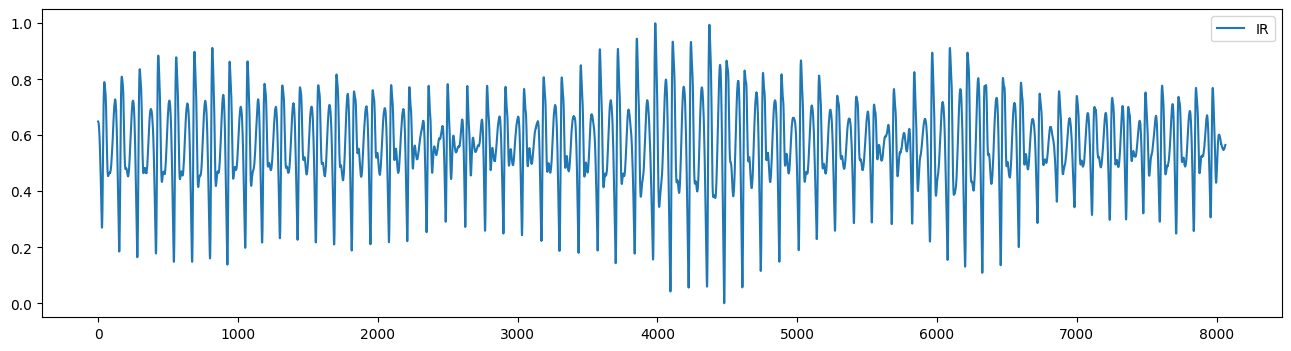

In [11]:
df=pd.read_csv('p.csv')
plotting(df.iloc[0].to_list())

In [10]:
normalize_values('dataset_transoform/PPG/ppg_01.csv','p.csv')

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

gsr_data=pd.DataFrame()
ppg_data=pd.DataFrame()
labels_data=pd.DataFrame()

dir='dataset_transoform'


folders=os.listdir(dir)
gsrfiles=os.listdir(dir+'/GSR')
ppgfiles=os.listdir(dir+'/PPG')

labelsfiles=os.listdir('dataset/labels')
print(labelsfiles)

for i in range(len(gsrfiles)):
    gsr=pd.read_csv(dir+'/'+'GSR'+'/'+gsrfiles[i],header=None)
    ppg=pd.read_csv(dir+'/'+'PPG'+'/'+ppgfiles[i],header=None)
    labels=pd.read_csv('dataset/'+'labels'+'/'+labelsfiles[i],header=None)
    gsr_data=pd.concat([gsr_data,gsr],ignore_index=True)
    ppg_data=pd.concat([ppg_data,ppg],ignore_index=True)
    labels_data=pd.concat([labels_data,labels],ignore_index=True)
    print(gsr_data.shape)
    print(ppg_data.shape)
    print(labels_data.shape)

# df_normalized = df.div(df.max())
# gsr_data=gsr_data.div(gsr_data.max())
# ppg_data=ppg_data.div(ppg_data.max())

# print(gsr_data.head())
# gsr_data_list=gsr_data.to_numpy().tolist()
# ppg_data_list=ppg_data.to_numpy().tolist()
# input_list=[]

# for i in range(len(gsr_data)):
#     input_list.append([gsr_data_list[i],ppg_data_list[i]])

# input=np.array(input_list)

# input.shape

# plt.plot(ppg_data_list[0])

['label_01.csv', 'label_02.csv', 'label_03.csv', 'label_04.csv', 'label_05.csv', 'label_06.csv', 'label_07.csv', 'label_08.csv', 'label_09.csv', 'label_10.csv', 'label_11.csv', 'label_12.csv', 'label_13.csv', 'label_14.csv', 'label_15.csv', 'label_16.csv', 'label_17.csv', 'label_18.csv', 'label_19.csv', 'label_20.csv']
(40, 8064)
(40, 8064)
(40, 4)
(80, 8064)
(80, 8064)
(80, 4)
(120, 8064)
(120, 8064)
(120, 4)
(160, 8064)
(160, 8064)
(160, 4)
(200, 8064)
(200, 8064)
(200, 4)
(240, 8064)
(240, 8064)
(240, 4)
(280, 8064)
(280, 8064)
(280, 4)
(320, 8064)
(320, 8064)
(320, 4)
(360, 8064)
(360, 8064)
(360, 4)
(400, 8064)
(400, 8064)
(400, 4)
(440, 8064)
(440, 8064)
(440, 4)
(480, 8064)
(480, 8064)
(480, 4)
(520, 8064)
(520, 8064)
(520, 4)
(560, 8064)
(560, 8064)
(560, 4)
(600, 8064)
(600, 8064)
(600, 4)
(640, 8064)
(640, 8064)
(640, 4)
(680, 8064)
(680, 8064)
(680, 4)
(720, 8064)
(720, 8064)
(720, 4)
(760, 8064)
(760, 8064)
(760, 4)
(800, 8064)
(800, 8064)
(800, 4)


In [30]:
gsr_data_arr=np.array(gsr_data.values)
ppg_data_arr=np.array(ppg_data.values)
labels_data_arr=np.array(labels_data.values)



(800, 8064)


In [32]:
gsr_data_list=gsr_data.to_numpy().tolist()
ppg_data_list=ppg_data.to_numpy().tolist()
input_list=[]

for i in range(len(gsr_data)):
    input_list.append([gsr_data_list[i],ppg_data_list[i]])

input=np.array(input_list)

input.shape

(800, 2, 8064)

In [54]:

num_samples = 800
input_shape = (2, 8064)

# Generate random input data
# Generate random target data

# Split the data into training and validation sets
val_split = 0.2
num_val_samples = int(num_samples * val_split)
num_train_samples = num_samples - num_val_samples

train_inputs = input[:780]
train_targets = labels_data_arr[:780]
val_inputs = input[780:]
val_targets = labels_data_arr[780:]

# Print the shape of the data
print("Train Inputs shape:", train_inputs.shape)
print("Train Targets shape:", train_targets.shape)
print("Val Inputs shape:", val_inputs.shape)
print("Val Targets shape:", val_targets.shape)

Train Inputs shape: (780, 2, 8064)
Train Targets shape: (780, 4)
Val Inputs shape: (20, 2, 8064)
Val Targets shape: (20, 4)


In [74]:
import tensorflow as tf

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((2, 8064, 1), input_shape=(2, 8064)),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4)
])

# Compile the model
model.compile(  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_3 (Reshape)         (None, 2, 8064, 1)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 8064, 32)       320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 4032, 32)      0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 129024)            0         
                                                                 
 dense_6 (Dense)             (None, 64)                8257600   
                                                                 
 dense_7 (Dense)             (None, 4)                 260       
                                                      

In [56]:
model.fit(x=train_inputs,y=train_targets, epochs=30, batch_size=1)

Epoch 1/30
780/780 [==============================] - 109s 139ms/step - loss: 5.6801
Epoch 2/30
780/780 [==============================] - 108s 139ms/step - loss: 4.3731
Epoch 3/30
780/780 [==============================] - 108s 138ms/step - loss: 3.6193
Epoch 4/30
780/780 [==============================] - 109s 140ms/step - loss: 2.4221
Epoch 5/30
780/780 [==============================] - 110s 141ms/step - loss: 1.6760
Epoch 6/30
780/780 [==============================] - 114s 146ms/step - loss: 1.2397
Epoch 7/30
780/780 [==============================] - 111s 143ms/step - loss: 0.8795
Epoch 8/30
780/780 [==============================] - 108s 139ms/step - loss: 0.6825
Epoch 9/30
780/780 [==============================] - 110s 141ms/step - loss: 0.6735
Epoch 10/30
780/780 [==============================] - 111s 142ms/step - loss: 0.5591
Epoch 11/30
780/780 [==============================] - 110s 141ms/step - loss: 0.4323
Epoch 12/30
780/780 [==============================] - 110s 141

In [62]:
print(model.predict([input[0].tolist()]))
print(labels_data_arr[0])

1/1 [==============================] - 0s 58ms/step
[[7.8172607 7.2060127 6.498881  8.0067215]]
[7.71 7.6  6.9  7.83]


In [63]:
model.save('emodetect_100ep_1bs.h5')

In [71]:
from PIL import Image
import numpy as np

for i in range(len(input)):
    data =input[i]*256
    data=data.round()
    print(data)
    img = Image.fromarray(data,mode="L") 
    img.save('img/{}.jpg'.format(i))

[[133. 151. 147. ... 138. 133. 127.]
 [148. 147. 145. ... 132. 134. 136.]]
[[125. 122. 123. ... 118. 125. 123.]
 [166. 166. 166. ... 144. 144. 145.]]
[[126. 126. 126. ... 124. 122. 126.]
 [128. 128. 128. ... 131. 132. 132.]]
[[118.  63.  74. ...  81. 101. 121.]
 [176. 173. 170. ... 170. 168. 166.]]
[[114. 112. 110. ... 110. 107. 115.]
 [132. 136. 139. ... 118. 117. 115.]]
[[116. 132. 142. ... 102.  95. 128.]
 [144. 147. 149. ... 163. 152. 142.]]
[[107. 124. 137. ... 118. 116. 126.]
 [160. 160. 159. ... 143. 140. 137.]]
[[129. 129. 129. ... 132. 130. 127.]
 [130. 117. 103. ... 140. 138. 139.]]
[[160. 184.  25. ... 171. 178. 167.]
 [146. 146. 147. ... 144. 150. 155.]]
[[121.   9.  51. ... 152. 150. 147.]
 [121. 105.  90. ... 143. 141. 140.]]
[[151. 147. 169. ... 153. 132. 140.]
 [137. 136. 135. ... 136. 136. 137.]]
[[122. 161. 156. ... 103. 111. 119.]
 [142. 144. 147. ... 143. 142. 141.]]
[[ 70. 106.   1. ... 118. 138. 132.]
 [156. 155. 154. ... 137. 137. 134.]]
[[132. 150. 163. ... 128.

In [96]:
def classify_values(v):
    val=v[0]
    ar=v[1]
    if(val>=5 and ar>=5):
        return 0
    elif(val<5 and ar>=5):
        return 1
    elif(val<5 and ar<5):
        return 2
    else:
        return 3
    
for i in range(len(labels_data_arr)):
    cl=classify_values(labels_data_arr[i])
    img=Image.open('img/{}.jpg'.format(i))
    img=img.resize((224,224))
    img.save('dataset_img2/{}/{}.jpg'.format(cl,i))


In [87]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                                    validation_split=0.2
                                    
                                    )

test_datagen = ImageDataGenerator(rescale = 1./255)

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('dataset_img',
color_mode='grayscale',
                                                 target_size = (2, 8064),
                                                 batch_size = 32,
                                                class_mode = 'categorical',
                                                subset="training"         
                                                 )
# Make sure you provide the same target size as initialied for the image size
validation_set = train_datagen.flow_from_directory('dataset_img',
color_mode='grayscale',
                                                 target_size = (2, 8064),
                                                 batch_size = 32,
                                                class_mode = 'categorical',
                                                subset="validation"         
                                                 )

Found 642 images belonging to 4 classes.
Found 158 images belonging to 4 classes.


In [91]:
m=model.fit(
  training_set,
  epochs=30,
  
)

Epoch 1/30
21/21 [==============================] - 7s 313ms/step - loss: 4.3367 - accuracy: 0.2399
Epoch 2/30
21/21 [==============================] - 6s 296ms/step - loss: 5.5952 - accuracy: 0.2399
Epoch 3/30
21/21 [==============================] - 6s 289ms/step - loss: 12.2518 - accuracy: 0.2399
Epoch 4/30
21/21 [==============================] - 7s 313ms/step - loss: 12.2518 - accuracy: 0.2399
Epoch 5/30
21/21 [==============================] - 6s 294ms/step - loss: 12.2518 - accuracy: 0.2399
Epoch 6/30
21/21 [==============================] - 6s 284ms/step - loss: 12.2518 - accuracy: 0.2399
Epoch 7/30
21/21 [==============================] - 6s 294ms/step - loss: 12.2518 - accuracy: 0.2399
Epoch 8/30
21/21 [==============================] - 6s 305ms/step - loss: 12.2518 - accuracy: 0.2399
Epoch 9/30
21/21 [==============================] - 6s 286ms/step - loss: 12.2518 - accuracy: 0.2399
Epoch 10/30
21/21 [==============================] - 6s 284ms/step - loss: 12.2518 - accuracy

In [89]:
training_set.image_shape

(2, 8064, 1)

In [90]:
validation_set.image_shape

(2, 8064, 1)

1/1 [==============================] - 0s 92ms/step


1

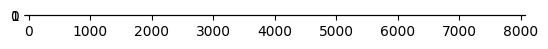

In [93]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def load(filename):
   np_image = Image.open(filename)
   np_image=np_image.resize((224,224))
   plt.imshow(np_image)
   np_image = np.array(np_image).astype('float32')/255
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

images=['dataset/test/tbone/9.jpg','dataset/test/toppel/9.jpg','dataset/test/toppel/9.jpg','dataset/test/tbone/10.jpg','dataset/test/tbone/16.jpg','dataset/test/headon/3.jpg','dataset/test/headon/13.jpg']

img=load('dataset_img/0/0.jpg')
np.argmax(model.predict(img))

In [2]:
from scipy import signal
from biosppy.signals import ecg
import pandas as pd 
ppg=pd.read_csv('dataset_transoform copy/PPG/ppg_01.csv')
gsr=pd.read_csv('dataset/GSR/gsr_01.csv')
# Compute the R-R intervals from the PPG signal

def feature_extract(ppg,gsr):
    b, a = signal.butter(2, 0.5, 'highpass')
    ppg1 = signal.filtfilt(b, a, ppg)

    # Normalize the data to have a mean of 0 and standard deviation of 1
    ppg1 = (ppg1 - np.mean(ppg1)) / np.std(ppg1)

    rpeaks, = ecg.hamilton_segmenter(signal=ppg1, sampling_rate=100)
    rr_intervals = np.diff(rpeaks)

    # Compute the time-domain HRV features
    hrv_mean = np.mean(rr_intervals)
    hrv_sdnn = np.std(rr_intervals)
    hrv_rmssd = np.sqrt(np.mean(np.square(np.diff(rr_intervals))))

    # Compute the frequency-domain HRV features
    freq, power = signal.periodogram(rr_intervals, fs=100)
    print(freq)
    lf_power = np.sum(power[(freq >= 0.04) & (freq < 0.15)])
    hf_power = np.sum(power[(freq >= 0.15) & (freq < 0.4)])
    lf_hf_ratio = lf_power / hf_power
    gsr_mean = np.mean(gsr)
    gsr_std = np.std(gsr)
    gsr_range = np.max(gsr) - np.min(gsr)

    # Compute the number of peaks in the GSR signal
    peaks, _ = signal.find_peaks(gsr, height=0)
    num_peaks = len(peaks)

    # Compute the mean and standard deviation of the inter-peak intervals
    ipis = np.diff(peaks)
    ipi_mean = np.mean(ipis)
    ipi_std = np.std(ipis)

    return [hrv_rmssd ,hrv_sdnn,hrv_mean,ipis ,ipi_mean,ipi_std,peaks,num_peaks,gsr_mean,gsr_std,gsr_range,lf_power,hf_power,lf_hf_ratio]

In [117]:
feature_extract(ppg.iloc[0],gsr.iloc[0])

[ 0.          0.51282051  1.02564103  1.53846154  2.05128205  2.56410256
  3.07692308  3.58974359  4.1025641   4.61538462  5.12820513  5.64102564
  6.15384615  6.66666667  7.17948718  7.69230769  8.20512821  8.71794872
  9.23076923  9.74358974 10.25641026 10.76923077 11.28205128 11.79487179
 12.30769231 12.82051282 13.33333333 13.84615385 14.35897436 14.87179487
 15.38461538 15.8974359  16.41025641 16.92307692 17.43589744 17.94871795
 18.46153846 18.97435897 19.48717949 20.         20.51282051 21.02564103
 21.53846154 22.05128205 22.56410256 23.07692308 23.58974359 24.1025641
 24.61538462 25.12820513 25.64102564 26.15384615 26.66666667 27.17948718
 27.69230769 28.20512821 28.71794872 29.23076923 29.74358974 30.25641026
 30.76923077 31.28205128 31.79487179 32.30769231 32.82051282 33.33333333
 33.84615385 34.35897436 34.87179487 35.38461538 35.8974359  36.41025641
 36.92307692 37.43589744 37.94871795 38.46153846 38.97435897 39.48717949
 40.         40.51282051 41.02564103 41.53846154 42.

C:\Users\sw09\AppData\Local\Temp\ipykernel_17868\876074283.py:27: RuntimeWarning: invalid value encountered in double_scalars
  lf_hf_ratio = lf_power / hf_power


[30.750073338274795,
 19.51643552887653,
 41.12820512820513,
 array([ 256,    8,  140, 2520,  636,   44,  484,  300,  248,   14,   10,
           8,  198], dtype=int64),
 374.3076923076923,
 647.2411730527305,
 array([ 451,  707,  715,  855, 3375, 4011, 4055, 4539, 4839, 5087, 5101,
        5111, 5119, 5317], dtype=int64),
 14,
 -4327.193321453373,
 7475.097870195626,
 29054.6,
 0.0,
 0.0,
 nan]

In [30]:
from scipy.stats import skew,kurtosis,entropy,median_abs_deviation
def onecycle(ppg):
        b, a = signal.butter(2, 0.5, 'highpass')
        ppg1 = signal.filtfilt(b, a, ppg)

        # Normalize the data to have a mean of 0 and standard deviation of 1
        ppg1 = (ppg1 - np.mean(ppg1)) / np.std(ppg1)

        rpeaks, = ecg.hamilton_segmenter(signal=ppg1, sampling_rate=100)
        rr_intervals = np.diff(rpeaks)

        # Compute the time-domain HRV features
        hrv_mean = np.mean(rr_intervals)
        hrv_sdnn = np.std(rr_intervals)
        hrv_rmssd = np.sqrt(np.mean(np.square(np.diff(rr_intervals))))

        length=len(ppg)
        peaks, _ = find_peaks(ppg, distance=15)
        min1=9999999
        min2=9999999
        for i in range(peaks[0],peaks[1]):
            if ppg[i]<min1:
                min1=i
        for i in range(peaks[1],peaks[2]):
            if ppg[i]<min2:
                min2=i
        if abs(peaks[2]-peaks[1])>22.5:
            min2=peaks[0]+min1
    #     print(min1,min2)
        final=ppg[min1-1:min2]
        plotting(ppg)
        final=ppg
        mean=np.mean(final)
        std=np.std(final)
        median = np.median(final)
        skewness=skew(final)
        kurt=kurtosis(final)
        p10,p25,p30,p50,p75,p80,p90 = np.nanpercentile(final,[10,25,30,50,75,80,90])
        IQR = p75-p25
        EN = entropy(final)
        mid_AD = median_abs_deviation(final)
        mean_AD = sum([abs(i-np.mean(final)) for i in final])/len(final)
        RMS =  np.sqrt(sum([i**2 for i in final])/len(final))
        spec_EN = entropy(final)/np.log2(len(final))
        #print([mean,std,skewness,kurt,p10,p25,p30,p50,p75,p80,p90])
        return [hrv_rmssd,hrv_sdnn, hrv_mean,mean,median,std,kurt,skewness,p10,p25,p30,p50,p75,p80,p90,IQR,EN,mid_AD,mean_AD,RMS,spec_EN]

In [32]:
onecycle(gsr.iloc[31])

[48.01756214667508,
 33.89740319448376,
 51.59090909090909,
 48919.21356163194,
 49060.0,
 23662.631341873108,
 -0.7908656394227345,
 -0.23104501992739362,
 16872.0,
 31638.0,
 34262.9,
 49060.0,
 68395.0,
 72696.0,
 81182.8,
 36757.0,
 -inf,
 18173.5,
 19760.330137880817,
 54341.600800031185,
 -inf]

Error in callback <function flush_figures at 0x00000218D165DF80> (for post_execute):


KeyboardInterrupt: 

In [42]:
import numpy as np
import pywt
import biosppy.signals.tools as st
import scipy.signal as signal

# Load PPG data
ppg_data = pd.read_csv('dataset/PPG/ppg_01.csv',header=None)

# Define sampling rate and time array
fs = 100  # Sampling rate in Hz
time = np.arange(len(ppg_data)) / fs

# Preprocess PPG data
ppg_filtered = st.filter_signal(signal=ppg_data, ftype='butter', band='bandpass',
                                 order=4, frequency=[0.5, 40], sampling_rate=fs)

# Calculate energy ratio
# energy_ratio = np.sum(ppg_filtered * 2) / np.sum(ppg_data * 2)

# Calculate tachogram power at 3 levels of frequency
f, tachogram = signal.periodogram(ppg_filtered, fs=fs, detrend='constant', scaling='density')
tachogram_power = []
for freq_range in [(0, 0.04), (0.04, 0.15), (0.15, 0.4)]:
    freq_idx = np.where((f >= freq_range[0]) & (f < freq_range[1]))
    power = np.mean(tachogram[freq_idx])
    tachogram_power.append(power)

# Calculate PSD at 4 frequency ranges
f, psd = signal.welch(ppg_filtered, fs=fs, nperseg=1024, scaling='density')
psd_ranges = [(0, 0.04), (0.04, 0.15), (0.15, 0.4), (0.4, 1)]
psd_values = []
for freq_range in psd_ranges:
    freq_idx = np.where((f >= freq_range[0]) & (f < freq_range[1]))
    power = np.mean(psd[freq_idx])
    psd_values.append(power)

# Calculate mean and standard deviation of IBI
ibi = np.diff(tachogram) / fs
mean_ibi = np.mean(ibi)
std_ibi = np.std(ibi)

# Calculate multiscale entropy at 5 levels
mse_values = []
for level in range(1, 6):
    mse = multiscale_entropy(ppg_filtered, m=2, r=0.1, level=level)
    mse_values.append(mse)

# Print results
print("Energy ratio:", energy_ratio)
print("Tachogram power at 3 levels of frequency:", tachogram_power)
print("PSD at 4 frequency ranges:", psd_values)
print("Mean IBI:", mean_ibi)
print("Standard deviation of IBI:", std_ibi)
print("Multiscale entropy at 5 levels:", mse_values)

c:\Python311\Lib\site-packages\scipy\signal\_spectral_py.py:266: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asarray(x)


TypeError: unsupported operand type(s) for +: 'float' and 'dict'